<a href="https://colab.research.google.com/github/Loopercool/Data-Detectives/blob/main/Diti_202311010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

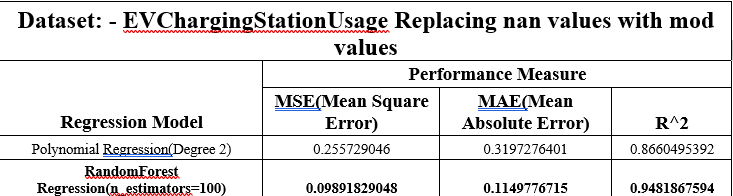

In [ ]:
#In this file I(Diti Soni) worked on dataset in which i replaced null values with Mode of thier resp column
#Firstly I droped columns according to my domain knowledge and some by experimenting
#Then resplayed some data visualizations
#For preprocessing Firstly I convert START and END time to numeric value according to thier time zone given
#Outlier were removed
#Then label encoding was done to convert categorical values to numeric
#Then regression was applied and result is as follow:
from IPython.display import Image
image_path = '/content/drive/MyDrive/EvCharge/Screenshot 2023-09-17 221753.png'
Image(filename=image_path)

# **Import**

In [ ]:
#importing necessary files
import math
import numpy as np
import pandas as pd
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import pytz
from datetime import datetime

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing dataset from drive
df_main = pd.read_csv("/content/drive/MyDrive/EvCharge/EVChargingStationUsage.csv")

<ipython-input-3-201d37592435>:2: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv("/content/drive/MyDrive/EvCharge/EVChargingStationUsage.csv")


In [ ]:
#droping columns according to domain knowledge(a little domain knowledge)
columns_to_drop=['GHG Savings (kg)','Gasoline Savings (gallons)','Currency','Country','Org Name','Plug Type','Port Type','Port Number','User ID']
df_main.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df_main.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'Start Time Zone',
       'End Date', 'End Time Zone', 'Transaction Date (Pacific Time)',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Latitude', 'Longitude', 'Fee', 'Ended By', 'Plug In Event Id',
       'Driver Postal Code', 'County', 'System S/N', 'Model Number'],
      dtype='object')

# **Remove Entries having nan value**

In [ ]:
#replacing with mode
for column in df_main.columns:
    mode_value = df_main[column].mode().iloc[0]
    df_main[column].fillna(mode_value, inplace=True)

In [ ]:
data_cleaned = df_main

In [ ]:
#priting number of null values in each column
data_cleaned.isnull().sum()

Station Name                       0
MAC Address                        0
Start Date                         0
Start Time Zone                    0
End Date                           0
End Time Zone                      0
Transaction Date (Pacific Time)    0
Total Duration (hh:mm:ss)          0
Charging Time (hh:mm:ss)           0
Energy (kWh)                       0
EVSE ID                            0
Address 1                          0
City                               0
State/Province                     0
Postal Code                        0
Latitude                           0
Longitude                          0
Fee                                0
Ended By                           0
Plug In Event Id                   0
Driver Postal Code                 0
County                             0
System S/N                         0
Model Number                       0
dtype: int64

In [ ]:
data_cleaned.shape

(259415, 24)

# **Converting *START DATE, Start time Zone* to numeric**

In [ ]:
#For converting PST to PDT and apply numeric conversion
selected_columns = ["Start Date", "Start Time Zone"]

dfa = data_cleaned[selected_columns]

In [ ]:
# Define time zones
pst = pytz.timezone('US/Pacific')
pdt = pytz.timezone('US/Pacific')

# Function to convert PST to PDT
def convert_pst_to_pdt(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    dt_object = pst.localize(dt_object)
    dt_object_pdt = dt_object.astimezone(pdt)

    return dt_object_pdt

def convert_to_numeric(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    numeric_value = dt_object.timestamp()

    return numeric_value

converted_date_times = []
numeric_values = []

for index, row in dfa.iterrows():
    if row["Start Time Zone"] == "PST":
        converted_dt = convert_pst_to_pdt(row["Start Date"])
    else:
        converted_dt = datetime.strptime(row["Start Date"], "%m/%d/%Y %H:%M")

    converted_date_times.append(converted_dt)
    numeric_value = convert_to_numeric(row["Start Date"])
    numeric_values.append(numeric_value)

dfa["ConvertedDateTime"] = converted_date_times
dfa["NumericValue"] = numeric_values

print(dfa)

data_cleaned["Start Date"] = dfa["NumericValue"]

              Start Date Start Time Zone          ConvertedDateTime  \
0        7/29/2011 20:17             PDT        2011-07-29 20:17:00   
1         7/30/2011 0:00             PDT        2011-07-30 00:00:00   
2         7/30/2011 8:16             PDT        2011-07-30 08:16:00   
3        7/30/2011 14:51             PDT        2011-07-30 14:51:00   
4        7/30/2011 18:51             PDT        2011-07-30 18:51:00   
...                  ...             ...                        ...   
259410  12/31/2020 16:39             PST  2020-12-31 16:39:00-08:00   
259411  12/31/2020 16:48             PST  2020-12-31 16:48:00-08:00   
259412  12/31/2020 17:28             PST  2020-12-31 17:28:00-08:00   
259413  12/31/2020 17:49             PST  2020-12-31 17:49:00-08:00   
259414  12/31/2020 18:19             PST  2020-12-31 18:19:00-08:00   

        NumericValue  
0       1.311971e+09  
1       1.311984e+09  
2       1.312014e+09  
3       1.312037e+09  
4       1.312052e+09  
...      

<ipython-input-10-f029ae051f8b>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["ConvertedDateTime"] = converted_date_times
<ipython-input-10-f029ae051f8b>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["NumericValue"] = numeric_values


In [ ]:
#As there were values which were not in datetime format and was making it hard for time-numeric convertion so we choose to remove them
# Filter out rows with invalid date and time values

print("Original dataset:")
print(data_cleaned)

# Function to check if a value is a valid date and time format
def is_valid_datetime(value):
    try:
        datetime.strptime(value, '%m/%d/%Y %H:%M')
        return True
    except ValueError:
        return False

data_cleaned = data_cleaned[df_main['End Date'].apply(is_valid_datetime)]

Original dataset:
                          Station Name          MAC Address    Start Date  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.311971e+09   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.311984e+09   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.312014e+09   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.312037e+09   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  1.312052e+09   
...                                ...                  ...           ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81  1.609433e+09   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609433e+09   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37  1.609436e+09   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  1.609437e+09   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A  1.609439e+09   

       Start Time Zone          End Date End Time Zone  \

In [ ]:
#For converting PST to PDT and apply numeric conversion
selected_columns = ['End Date', 'End Time Zone']

dfb = data_cleaned[selected_columns]

In [ ]:
# Define time zones
pst = pytz.timezone('US/Pacific')
pdt = pytz.timezone('US/Pacific')

# Function to convert PST to PDT
def convert_pst_to_pdt(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    dt_object = pst.localize(dt_object)
    dt_object_pdt = dt_object.astimezone(pdt)

    return dt_object_pdt

def convert_to_numeric(date_str):
    dt_object = datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    numeric_value = dt_object.timestamp()

    return numeric_value

converted_date_times = []
numeric_values = []

for index, row in dfb.iterrows():
    if row["End Time Zone"] == "PST":
        converted_dt = convert_pst_to_pdt(row["End Date"])
    else:
        converted_dt = datetime.strptime(row["End Date"], "%m/%d/%Y %H:%M")

    converted_date_times.append(converted_dt)
    numeric_value = convert_to_numeric(row["End Date"])
    numeric_values.append(numeric_value)

dfb["ConvertedDateTime"] = converted_date_times
dfb["NumericValue"] = numeric_values

print(dfb)

data_cleaned["End Date"] = dfa["NumericValue"]

                End Date End Time Zone          ConvertedDateTime  \
0        7/29/2011 23:20           PDT        2011-07-29 23:20:00   
1         7/30/2011 0:02           PDT        2011-07-30 00:02:00   
2        7/30/2011 12:34           PDT        2011-07-30 12:34:00   
3        7/30/2011 16:55           PDT        2011-07-30 16:55:00   
4        7/30/2011 20:03           PDT        2011-07-30 20:03:00   
...                  ...           ...                        ...   
259410  12/31/2020 17:14           PST  2020-12-31 17:14:00-08:00   
259411  12/31/2020 20:31           PST  2020-12-31 20:31:00-08:00   
259412    1/1/2021 10:56           PST  2021-01-01 10:56:00-08:00   
259413  12/31/2020 21:55           PST  2020-12-31 21:55:00-08:00   
259414  12/31/2020 19:01           PST  2020-12-31 19:01:00-08:00   

        NumericValue  
0       1.311982e+09  
1       1.311984e+09  
2       1.312029e+09  
3       1.312045e+09  
4       1.312056e+09  
...              ...  
259410  1.

<ipython-input-13-75c889c56781>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb["ConvertedDateTime"] = converted_date_times
<ipython-input-13-75c889c56781>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb["NumericValue"] = numeric_values
<ipython-input-13-75c889c56781>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
data_cleaned.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'Start Time Zone',
       'End Date', 'End Time Zone', 'Transaction Date (Pacific Time)',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Latitude', 'Longitude', 'Fee', 'Ended By', 'Plug In Event Id',
       'Driver Postal Code', 'County', 'System S/N', 'Model Number'],
      dtype='object')

In [ ]:
#Droping original columns

columns_to_drop=['Start Time Zone','End Time Zone','Transaction Date (Pacific Time)']
data_cleaned.drop(columns=columns_to_drop, inplace=True)

<ipython-input-15-73ab62866251>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=columns_to_drop, inplace=True)


In [ ]:
#Function for numeric
def time_to_numeric(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    total_hours = hours + minutes / 60 + seconds / 3600
    return total_hours

data_cleaned['Total_time_hours'] = data_cleaned['Total Duration (hh:mm:ss)'].apply(time_to_numeric)

data_cleaned['Charging_time_hours'] = data_cleaned['Charging Time (hh:mm:ss)'].apply(time_to_numeric)

<ipython-input-16-26a9c2ee930d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Total_time_hours'] = data_cleaned['Total Duration (hh:mm:ss)'].apply(time_to_numeric)
<ipython-input-16-26a9c2ee930d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Charging_time_hours'] = data_cleaned['Charging Time (hh:mm:ss)'].apply(time_to_numeric)


In [ ]:
#dropping original column
columns_to_drop=['Total Duration (hh:mm:ss)','Charging Time (hh:mm:ss)']
data_cleaned.drop(columns=columns_to_drop, inplace=True)

<ipython-input-17-bbadedf6f900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=columns_to_drop, inplace=True)


<ipython-input-11-bfca263b2c9b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_main.corr(), lw = 1)


<Axes: >

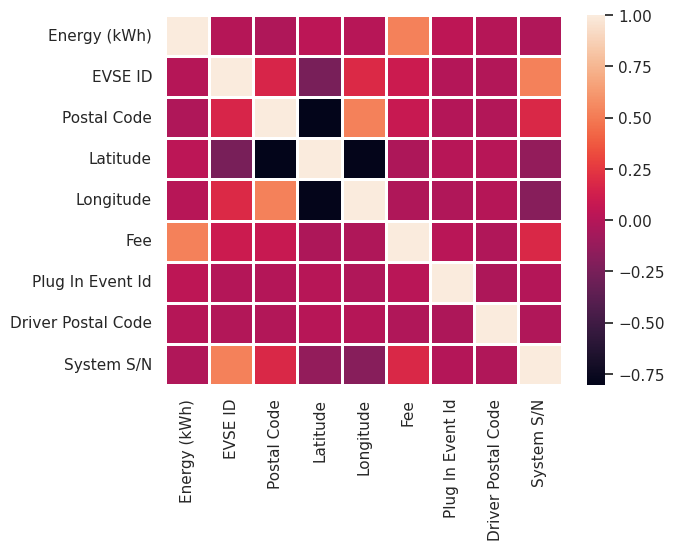

In [ ]:
sns.heatmap(data=df_main.corr(), lw = 1)

In [ ]:
# @title Removing outlier
data_cleaned.columns

Index(['Station Name', 'MAC Address', 'Start Date', 'End Date', 'Energy (kWh)',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Latitude', 'Longitude', 'Fee', 'Ended By', 'Plug In Event Id',
       'Driver Postal Code', 'County', 'System S/N', 'Model Number',
       'Total_time_hours', 'Charging_time_hours'],
      dtype='object')

In [ ]:
#displaying head
data_cleaned.head()

,Station Name,MAC Address,Start Date,End Date,Energy (kWh),EVSE ID,Address 1,City,State/Province,Postal Code,...,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,County,System S/N,Model Number,Total_time_hours,Charging_time_hours
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.311971e+09,1.311971e+09,6.249457,109785.0,250 Hamilton Ave,Palo Alto,California,94301,...,-122.160309,0.0,Plug Out at Vehicle,3,95124.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,3.058889,1.900833
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.311984e+09,1.311984e+09,0.106588,109785.0,250 Hamilton Ave,Palo Alto,California,94301,...,-122.160309,0.0,Customer,4,94301.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,0.035000,0.031667
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.312014e+09,1.312014e+09,14.951777,109785.0,250 Hamilton Ave,Palo Alto,California,94301,...,-122.160309,0.0,Plug Out at Vehicle,5,94301.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,4.292222,4.291111
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.312037e+09,1.312037e+09,7.159643,109785.0,250 Hamilton Ave,Palo Alto,California,94301,...,-122.160309,0.0,Customer,6,94302.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,2.056667,2.049444
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,1.312052e+09,1.312052e+09,1.957765,109785.0,250 Hamilton Ave,Palo Alto,California,94301,...,-122.160309,0.0,Plug Out at Vehicle,7,94043.0,Santa Clara County,1.427410e+11,CT4020-HD-GW,1.190000,0.731667


In [ ]:
per25 = df_cleaned['Driver Postal Code'].quantile(0.25)
per75 = df_cleaned['Driver Postal Code'].quantile(0.75)

In [ ]:
iqr = per75 - per25

In [ ]:
columns_to_handle = ['Driver Postal Code', 'Plug In Event Id', 'Fee','Postal Code', 'Latitude',
       'Longitude','Start Date', 'End Date','System S/N',
       'Total_time_hours', 'Charging_time_hours']

# Define a function to handle outliers using IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned[column] = df_cleaned[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return df

# Apply the IQR-based outlier handling to each column
for col in columns_to_handle:
    df_cleaned = handle_outliers_iqr(df_cleaned, col)

# Print the DataFrame after handling outliers
print(df_cleaned)

# **Label Encode categorical columns**

In [ ]:
categorical_columns = data_cleaned.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Station Name', 'MAC Address', 'Address 1', 'City', 'State/Province',
       'Ended By', 'County', 'Model Number'],
      dtype='object')


In [ ]:
categorical_columns = [col for col in categorical_columns if col != 'User ID']

In [ ]:
print(categorical_columns)

['Station Name', 'MAC Address', 'Address 1', 'City', 'State/Province', 'Ended By', 'County', 'Model Number']


In [ ]:
categorical_columns_1  = ['County', 'Model Number']

In [ ]:
#label encding for categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in categorical_columns:
  le = LabelEncoder()
  data_cleaned[column] = le.fit_transform(data_cleaned[column])
  label_encoders[column] = le

print(data_cleaned)

<ipython-input-24-a404cdbf93ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = le.fit_transform(data_cleaned[column])
<ipython-input-24-a404cdbf93ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = le.fit_transform(data_cleaned[column])
<ipython-input-24-a404cdbf93ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

        Station Name  MAC Address    Start Date      End Date  Energy (kWh)  \
0                 12           25  1.311971e+09  1.311971e+09      6.249457   
1                 12           25  1.311984e+09  1.311984e+09      0.106588   
2                 12           25  1.312014e+09  1.312014e+09     14.951777   
3                 12           25  1.312037e+09  1.312037e+09      7.159643   
4                 12           25  1.312052e+09  1.312052e+09      1.957765   
...              ...          ...           ...           ...           ...   
259410            42           58  1.609433e+09  1.609433e+09      1.841000   
259411            44           44  1.609433e+09  1.609433e+09     12.744000   
259412            21           78  1.609436e+09  1.609436e+09     29.665000   
259413            44           44  1.609437e+09  1.609437e+09     11.976000   
259414            10           61  1.609439e+09  1.609439e+09      1.571000   

          EVSE ID  Address 1  City  State/Province 

In [ ]:
#droping City and state as they are same for all rows
data_cleaned.drop(['City'],axis=1,inplace = True)
data_cleaned.drop(['State/Province'],axis=1,inplace=True)

<ipython-input-25-07a6f0543b04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(['City'],axis=1,inplace = True)
<ipython-input-25-07a6f0543b04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(['State/Province'],axis=1,inplace=True)


In [ ]:
data_cleaned.head()

,Station Name,MAC Address,Start Date,End Date,Energy (kWh),EVSE ID,Address 1,Postal Code,Latitude,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,County,System S/N,Model Number,Total_time_hours,Charging_time_hours
0,12,25,1.311971e+09,1.311971e+09,6.249457,109785.0,3,94301,37.444572,-122.160309,0.0,11,3,95124.0,1,1.427410e+11,6,3.058889,1.900833
1,12,25,1.311984e+09,1.311984e+09,0.106588,109785.0,3,94301,37.444572,-122.160309,0.0,1,4,94301.0,1,1.427410e+11,6,0.035000,0.031667
2,12,25,1.312014e+09,1.312014e+09,14.951777,109785.0,3,94301,37.444572,-122.160309,0.0,11,5,94301.0,1,1.427410e+11,6,4.292222,4.291111
3,12,25,1.312037e+09,1.312037e+09,7.159643,109785.0,3,94301,37.444572,-122.160309,0.0,1,6,94302.0,1,1.427410e+11,6,2.056667,2.049444
4,12,25,1.312052e+09,1.312052e+09,1.957765,109785.0,3,94301,37.444572,-122.160309,0.0,11,7,94043.0,1,1.427410e+11,6,1.190000,0.731667


# **Save CSV to google drive**

In [ ]:
#Saving preprocessed data
path = '/content/drive/MyDrive/Data_Mining/data_cleaned.csv'

data_cleaned.to_csv(path,index=False)

In [ ]:
#Extracting preprossesd data
data_cleaned = pd.read_csv('/content/drive/MyDrive/Data_Mining/data_cleaned.csv')

# **Regression**

In [ ]:
data_df = data_cleaned.drop(['Charging_time_hours'],axis=1)

In [ ]:
#importing libraries
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#test train spliting
X_train, X_test, y_train, y_test = train_test_split(data_df, data_cleaned['Charging_time_hours'], random_state=42, test_size=0.20)

In [ ]:
#scaling of dataset
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((207500, 18), (51875, 18))

# **Polynomial Regression**

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(X_poly, y_train)

# Predict using the trained model
predicted_values_poly = model.predict(X_test_poly)

poly_mse = mean_squared_error(y_test, predicted_values_poly)
poly_mae = mean_absolute_error(y_test, predicted_values_poly)
poly_r2 = r2_score(y_test, predicted_values_poly)

print("SGD Regression MSE:", poly_mse)
print("SGD Regression MAE:", poly_mae)
print("SGD Regression R-squared:", poly_r2)

SGD Regression MSE: 0.25572904597339996
SGD Regression MAE: 0.3197276401375227
SGD Regression R-squared: 0.8660495392487817


# **Random Forest Regression**

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = rf_regressor.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# **n_estimators = 100**

In [ ]:
print("RF Regression MSE:", rf_mse)
print("RF Regression MAE:", rf_mae)
print("RF Regression R-squared:", rf_r2)

RF Regression MSE: 0.09891829047525524
RF Regression MAE: 0.11497767148594377
RF Regression R-squared: 0.9481867594060414


In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf_regressor, X_train_scaled_cross, y, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive valuesx
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse_rf = np.mean(mse_scores)
std_mse_rf = np.std(mse_scores)

print(f'mean_mse : {mean_mse_rf}')
print(f'std_mse : {std_mse_rf}')

mean_mse : 0.1350020717592546
std_mse : 0.08959015654669855
